# LEAD SCORE CASE STUDY

### Problem Statement

- An education company named X Education sells online courses to industry professionals. 
- The company markets its courses on several sources. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. The typical lead conversion rate at X education is around 30%. 
- Say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
- If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


### Business Objective
- To find out the most promising leads for X education.
- Build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Displaying the 150 columns and rows

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [4]:
# importing machine learning libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

## Reading the Dataset

In [5]:
# reading the CSV file using pandas 'read_csv' method and storing it in leads variable
# also diplaying the first 5 rows 

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the Dataframe
Checking the Dataframe dimension, null values,summary of the dataframe

In [6]:
# Checking the number of rows and columns in the dataframe using ".shape" attribute

leads.shape

(9240, 37)

In [7]:
# Checking the column-wise info of the dataframe using ".info()" method

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking the summary for the numeric columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Missing Value Treatment

In [9]:
(leads.isnull().mean() * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

# Dropping the following columns¶
These columns are Sales related and does not add value to analysis and model building
- 'Tags','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score'

In [10]:
# dropping the columns with .drop() method

leads = leads.drop(['Tags','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score',
                  'Asymmetrique Activity Score' ],axis=1)

In [11]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [12]:
# Code to check which columns having 'Select' sub catergoty

column_names = list(leads.columns)
columns_select = []

for cols in column_names:
    if 'Select' in list(leads[cols]):
        columns_select.append(cols)

leads[columns_select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,Select,Select,Select,Select
1,Select,Select,Select,Select
2,Business Administration,Select,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,Select,Other,Select,Mumbai


In [13]:
# Replacing the "Select" sub categoty to Null value as the user has not provided any info

leads.loc[leads['Specialization']=='Select','Specialization']=np.nan
leads.loc[leads['How did you hear about X Education']=='Select','How did you hear about X Education']=np.nan
leads.loc[leads['Lead Profile']=='Select','Lead Profile']=np.nan
leads.loc[leads['City']=='Select','City']=np.nan

In [14]:
# Checking the percentage of null values in each column

(leads.isnull().mean() * 100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [15]:
# Dropping the columns having Null values more than 40%

leads = leads.drop(['How did you hear about X Education','Lead Profile'], axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [16]:
# for Columns having less than 40% null values creating one more sub category for those null values as 'Not Provided'

leads[['What is your current occupation','What matters most to you in choosing a course',
                                           'Specialization','City']]=leads[['What is your current occupation',
                                                                            'What matters most to you in choosing a course',
                                                                            'Specialization','City']].fillna('Not Provided')

In [17]:
# Checking the head of the data frame

leads[['What is your current occupation','What matters most to you in choosing a course','Specialization','City']].head()

,What is your current occupation,What matters most to you in choosing a course,Specialization,City
0,Unemployed,Better Career Prospects,Not Provided,Not Provided
1,Unemployed,Better Career Prospects,Not Provided,Not Provided
2,Student,Better Career Prospects,Business Administration,Mumbai
3,Unemployed,Better Career Prospects,Media and Advertising,Mumbai
4,Unemployed,Better Career Prospects,Not Provided,Mumbai


In [18]:
# Checking the Null value percentage for balance calumns

(leads.isnull().mean()*100).sort_values()

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
What matters most to you in choosing a course     0.000000
Specialization                                    0.000000
Total Time Spent on Website                       0.0000

In [19]:
# The Null value for these columns are very less, Replacing with the mode() feature.

max_lead_source   = leads['Lead Source'].mode()
max_lead_activity = leads['Last Activity'].mode()

leads['Lead Source'] = leads['Lead Source'].fillna(max_lead_source[0])
leads['Last Activity'] = leads['Last Activity'].fillna(max_lead_activity[0])

In [20]:
leads[['Page Views Per Visit','TotalVisits']].describe()

,Page Views Per Visit,TotalVisits
count,9103.000000,9103.000000
mean,2.362820,3.445238
std,2.161418,4.854853
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
max,55.000000,251.000000


In [21]:
# The Null value for these columns are very less, Replacing with the median() feature.

half_lead_views   = leads['Page Views Per Visit'].median()
half_lead_visit   = leads['TotalVisits'].median()

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(half_lead_views)
leads['TotalVisits']          = leads['TotalVisits'].fillna(half_lead_visit)

# Treating the columns having more than 3 sub-categories

In [22]:
# Code for selecting the columns having more than 3 sub categorical features

many_cats = []

for col in list(leads.columns):
    if type(leads[col][0]) == str:
        num_cats = len(leads[col].unique())
        if num_cats > 3:
            many_cats.append(col)

leads[many_cats].head()

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Not Provided,Unemployed,Better Career Prospects,Not Provided,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Not Provided,Unemployed,Better Career Prospects,Not Provided,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Not Provided,Unemployed,Better Career Prospects,Mumbai,Modified


In [23]:
# Checking the Statistical info and number of sub-categories for these columns

leads[many_cats].describe(include='all')

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,17,19,7,4,7,16
top,2d0cef3e-c2bb-47a3-b101-a3f700c29a2a,Landing Page Submission,Google,Email Opened,Not Provided,Unemployed,Better Career Prospects,Not Provided,Modified
freq,1,4886,2904,3540,3380,5600,6528,3669,3407


In [24]:
# checking the sub-category count in "Lead Origin" column, There are three sub-categories with very less count 

leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [25]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Lead_Origin_Other"

leads['Lead Origin'] = leads['Lead Origin'].apply(lambda x: 'Lead_Origin_Other' if x in ['Lead Add Form','Lead Import','Quick Add Form'] else x)
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead_Origin_Other           774
Name: Lead Origin, dtype: int64

In [26]:
# checking the sub-category count in "Lead Source" column, There are three sub-categories with very less count 

leads['Lead Source'].value_counts(normalize=True) * 100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Live Chat             0.021645
Social Media          0.021645
testone               0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
WeLearn               0.010823
youtubechannel        0.010823
blog                  0.010823
Pay per Click Ads     0.010823
Name: Lead Source, dtype: float64

In [27]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Lead_Source_Other"

leads['Lead Source'] = leads['Lead Source'].apply(lambda x: x if (x in ['Google','Direct Traffic','Olark Chat','Organic Search'])
                                                                 else 'Lead_Source_Other')

leads['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Lead_Source_Other     884
Name: Lead Source, dtype: int64

In [28]:
# checking the sub-category count in "Last Activity" column, There are three sub-categories with very less count 

leads['Last Activity'].value_counts(normalize=1)*100


Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [29]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Last_Activity_Other"

leads['Last Activity'] = leads['Last Activity'].apply(lambda x: x if (x in ['Email Opened','SMS Sent','Olark Chat Conversation'])
                                                                 else 'Last_Activity_Other')
leads['Last Activity'].value_counts(normalize=1)*100

Email Opened               38.311688
SMS Sent                   29.707792
Last_Activity_Other        21.450216
Olark Chat Conversation    10.530303
Name: Last Activity, dtype: float64

In [30]:
# checking the sub-category count in "Specialization" column, There are three sub-categories with very less count 

leads['Specialization'].value_counts(normalize=1)*100

Not Provided                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [31]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Specialization_Other"

leads['Specialization'] = leads['Specialization'].apply(lambda x: x if (x in ['Not Provided','Finance Management','Human Resource Management','Marketing Management'])
                                                                 else 'Specialization_Other')

leads['Specialization'].value_counts(normalize=1)*100

Not Provided                 36.580087
Specialization_Other         34.610390
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Name: Specialization, dtype: float64

In [32]:
# checking the sub-category count in "What is your current occupation" column, There are three sub-categories with very less count 

leads['What is your current occupation'].value_counts(normalize=1)*100

Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [33]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Occupation_Other"

leads['What is your current occupation'] = leads['What is your current occupation'].apply(lambda x: x if (x in ['Not Provided','Unemployed'])
                                                                 else 'Occupation_Other')

leads['What is your current occupation'].value_counts(normalize=1)*100

Unemployed          60.606061
Not Provided        29.112554
Occupation_Other    10.281385
Name: What is your current occupation, dtype: float64

In [34]:
# checking the sub-category count in "What matters most to you in choosing a course" column, There are three sub-categories with very less count 

leads['What matters most to you in choosing a course'].value_counts(normalize=1)*100

Better Career Prospects      70.649351
Not Provided                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [35]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Not Provided"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].apply(lambda x: x if (x in ['Better Career Prospects'])
                                                                 else 'Not Provided')

leads['What matters most to you in choosing a course'].value_counts(normalize=1)*100

Better Career Prospects    70.649351
Not Provided               29.350649
Name: What matters most to you in choosing a course, dtype: float64

In [36]:
# checking the sub-category count in "City" column, There are three sub-categories with very less count 

leads['City'].value_counts(normalize=1)*100

Not Provided                   39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [37]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "City_Others"

leads['City'] = leads['City'].apply(lambda x: x if (x in ['Not Provided','Mumbai']) else 'City_Others')
leads['City'].value_counts(normalize=1)*100

Not Provided    39.707792
Mumbai          34.870130
City_Others     25.422078
Name: City, dtype: float64

In [38]:
# checking the sub-category count in "Last Notable Activity" column, There are three sub-categories with very less count 

leads['Last Notable Activity'].value_counts(normalize=1)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Email Received                   0.010823
Approached upfront               0.010823
Resubscribed to emails           0.010823
Name: Last Notable Activity, dtype: float64

In [39]:
# Clubbing sub-categoty having very few records and Making  new sub-category as "Notable_Activity_Other"

leads['Last Notable Activity'] = leads['Last Notable Activity'].apply(lambda x: x if (x in ['Modified','Email Opened','SMS Sent'])
                                                                 else 'Notable_Activity_Other')

leads['Last Notable Activity'].value_counts(normalize=1)*100

Modified                  36.872294
Email Opened              30.595238
SMS Sent                  23.506494
Notable_Activity_Other     9.025974
Name: Last Notable Activity, dtype: float64

# Drop highly imbalanced columns

In [40]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9240,9240,9240,9240.000000,9240.000000,9240.000000,9240.000000,9240,6779,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,NaN,3,5,2,2,NaN,NaN,NaN,NaN,4,38,5,3,2,2,1,2,2,2,2,2,1,1,1,3,1,2,4
top,2d0cef3e-c2bb-47a3-b101-a3f700c29a2a,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Not Provided,No,No,Modified
freq,1,NaN,4886,2904,8506,9238,NaN,NaN,NaN,NaN,3540,6492,3380,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,3669,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.438636,487.698268,2.357440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.819024,548.021466,2.145781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Dropping the columns having the same category more than 90%.

leads = leads.drop(['Do Not Email','Do Not Call','Search','Country','Magazine','Newspaper Article','X Education Forums','Newspaper',
                    'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [42]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9240,9240.000000,9240.000000,9240.000000,9240.000000,9240,9240,9240,9240,9240,9240,9240
unique,9240,NaN,3,5,NaN,NaN,NaN,NaN,4,5,3,2,3,2,4
top,2d0cef3e-c2bb-47a3-b101-a3f700c29a2a,NaN,Landing Page Submission,Google,NaN,NaN,NaN,NaN,Email Opened,Not Provided,Unemployed,Better Career Prospects,Not Provided,No,Modified
freq,1,NaN,4886,2904,NaN,NaN,NaN,NaN,3540,3380,5600,6528,3669,6352,3407
mean,NaN,617188.435606,NaN,NaN,0.385390,3.438636,487.698268,2.357440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,0.486714,4.819024,548.021466,2.145781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

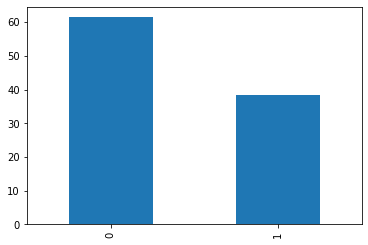

In [43]:
# Checking the Target Percentage

(100 * leads['Converted'].value_counts(normalize=True)).plot.bar()
plt.show()

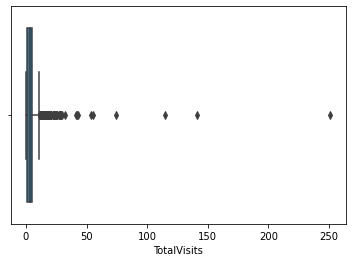

In [44]:
# boxplot for "TotalVisits" column

sns.boxplot(leads['TotalVisits'])
plt.show()

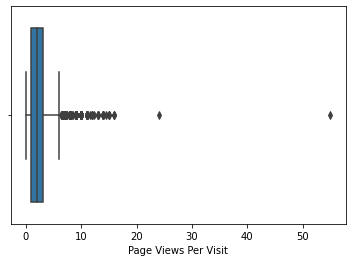

In [45]:
# boxplot for "Page Views Per Visit" column

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

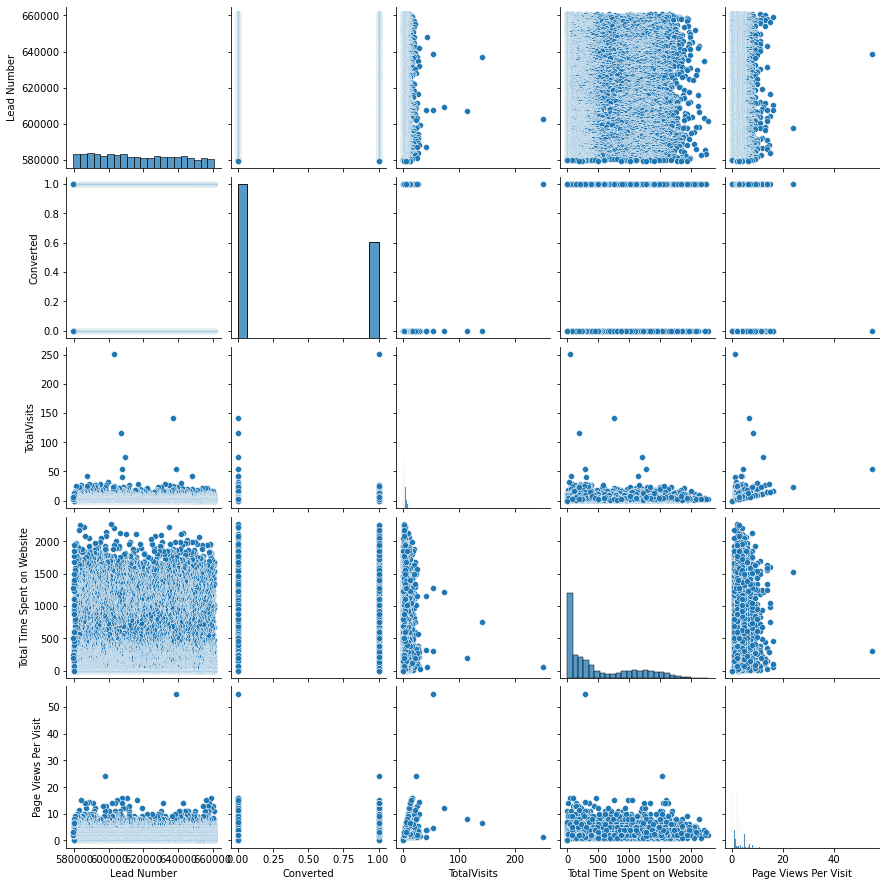

In [46]:
# Pairplot to see any inter-correlation between two numeric features

sns.pairplot(leads)
plt.show()

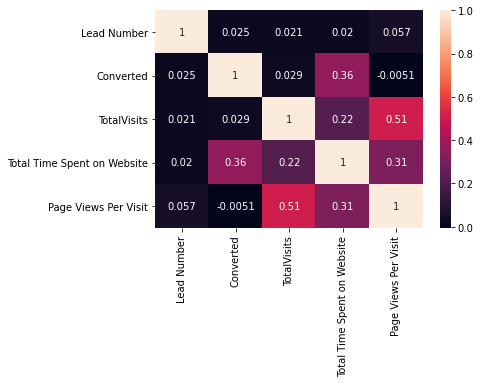

In [47]:
sns.heatmap(leads.corr(), annot=True)
plt.show()

In [48]:
# Function for Univariate and Bivariate analysis of categorical features

def uni_bi_analysis(feature):
    sub_feature_count = len(leads[feature].unique())
    if sub_feature_count > 3:        
        plt.figure(figsize=(20,9))
    elif sub_feature_count <= 3:
        plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.set_style('whitegrid')
    univariate = leads.groupby(feature).sum()['Converted']
    sns.barplot(x=univariate,y=univariate.index)
    plt.xlabel('Customer Count', fontdict={'fontsize':20})
    plt.ylabel(feature, fontdict={'fontsize':20})
    plt.title('Count of '+feature+'\n', fontdict={'fontsize':25})
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    
    plt.subplot(1,2,2)
    sns.set_style('whitegrid')
    bivariate = leads.groupby(feature).mean()['Converted']*100
    sns.barplot(x=bivariate,y=bivariate.index)
    plt.xlabel('Conversion Percentage', fontdict={'fontsize':20})
    plt.ylabel('', fontdict={'fontsize':20})
    plt.title(feature + ' conversion percentage\n', fontdict={'fontsize':25})
    plt.yticks([])
    plt.xticks(np.arange(0, 101, step=10),fontsize=20)
    
    plt.tight_layout()
    plt.show()

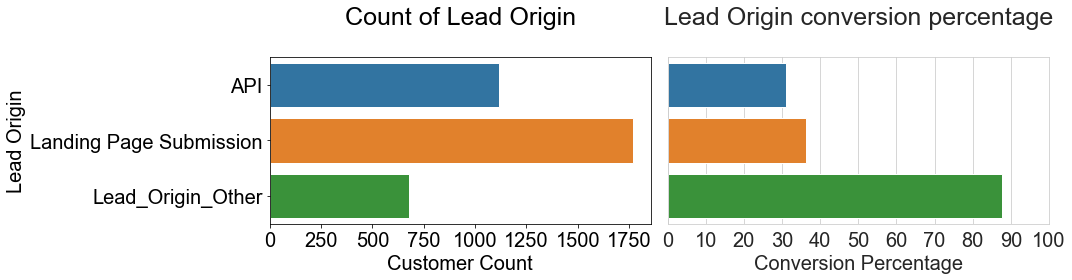

In [49]:
uni_bi_analysis('Lead Origin')

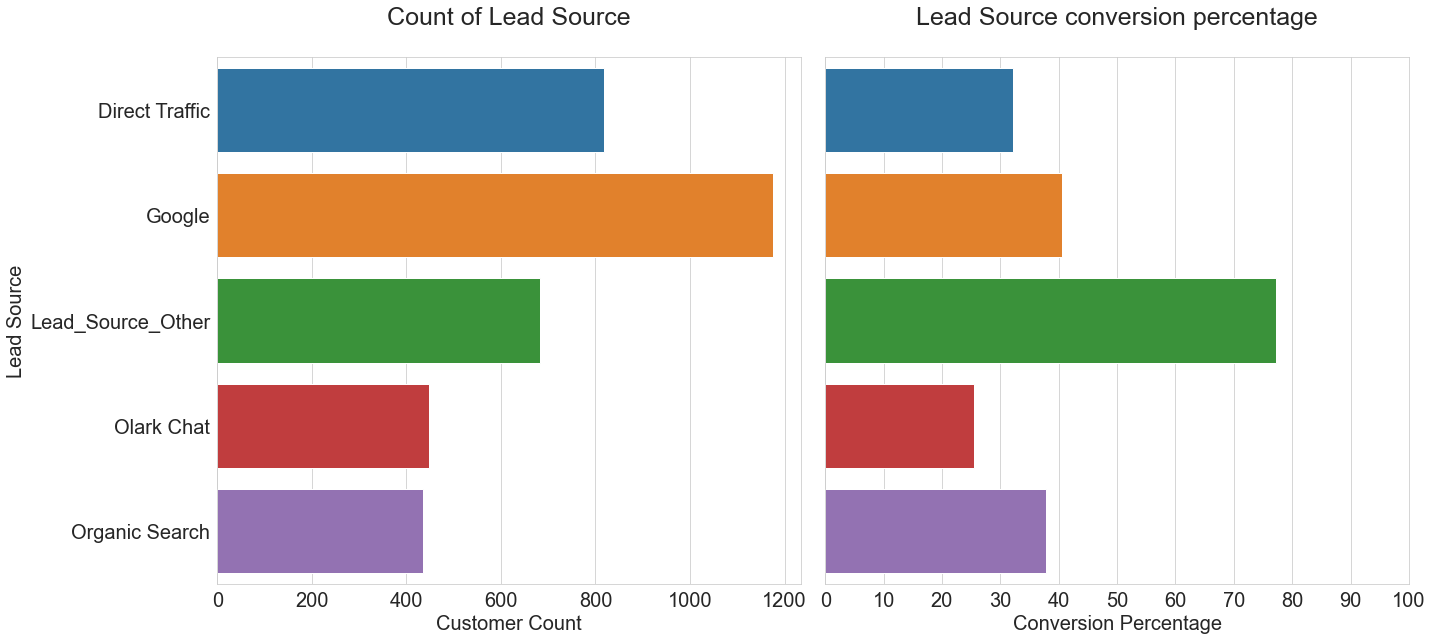

In [50]:
uni_bi_analysis('Lead Source')

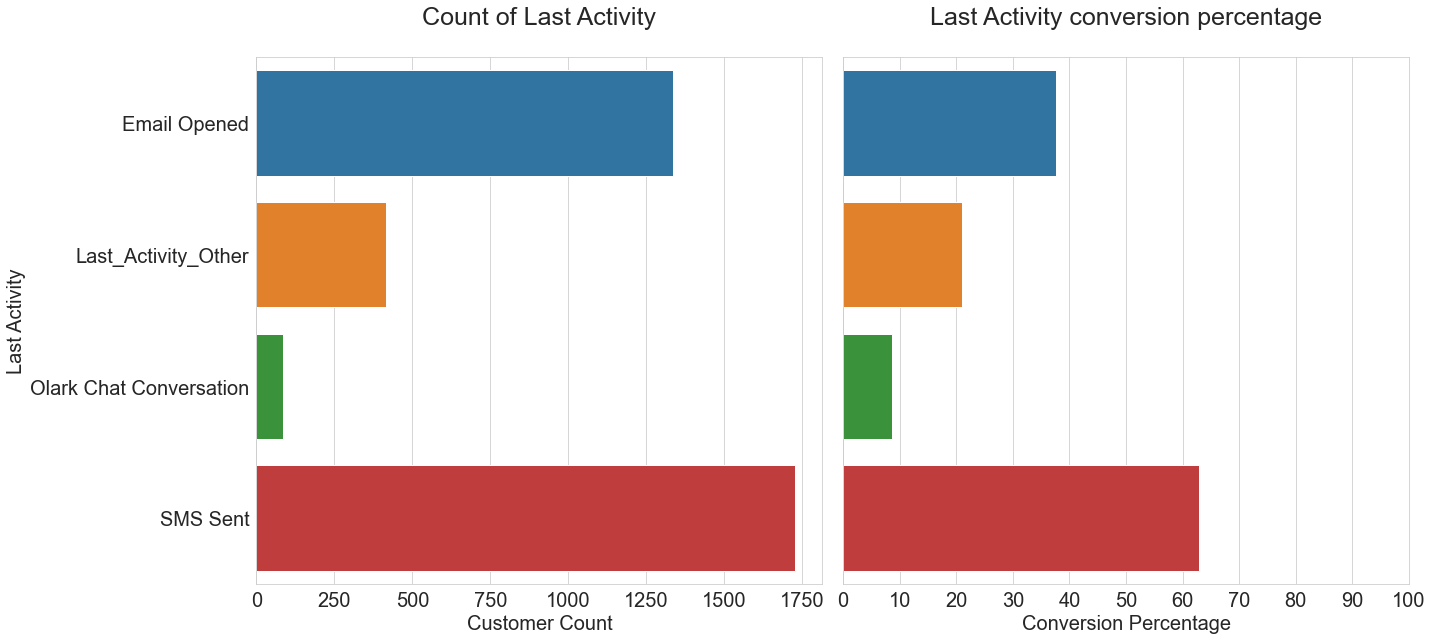

In [51]:
uni_bi_analysis('Last Activity')

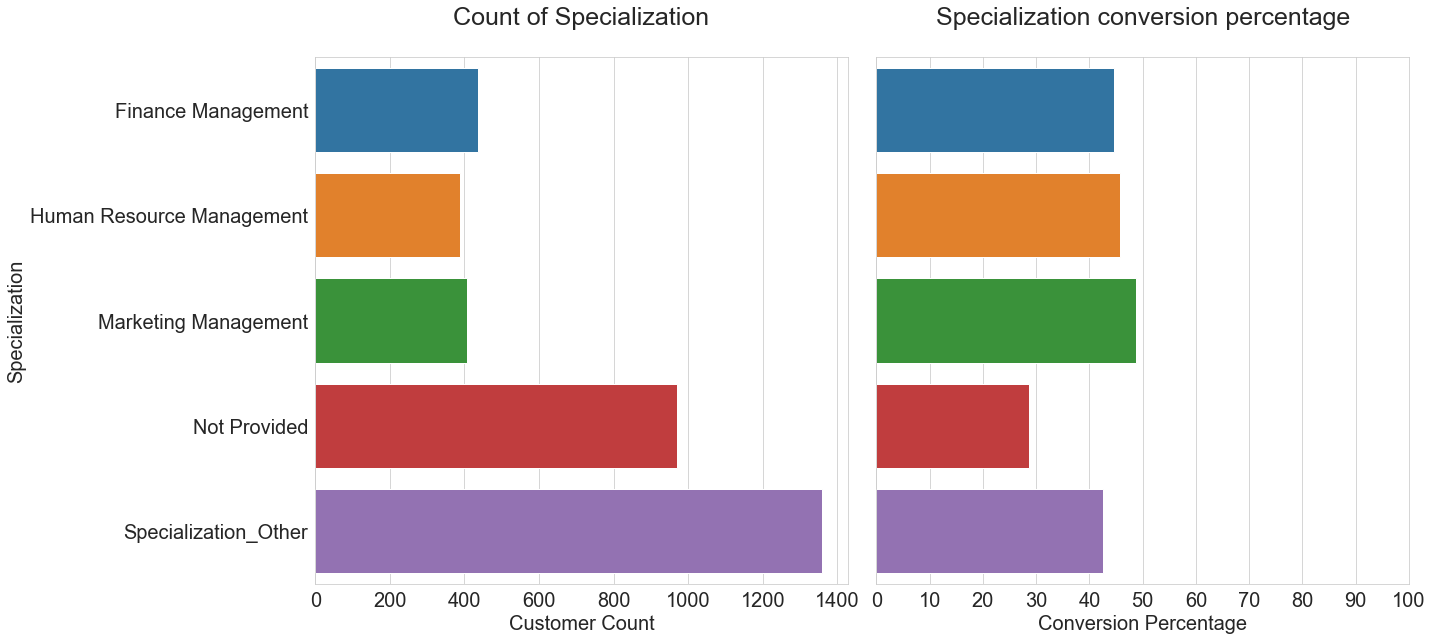

In [52]:
uni_bi_analysis('Specialization')

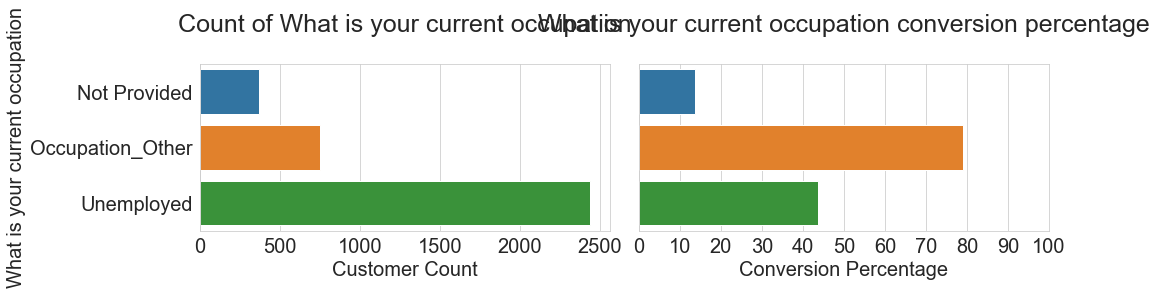

In [53]:
uni_bi_analysis('What is your current occupation')

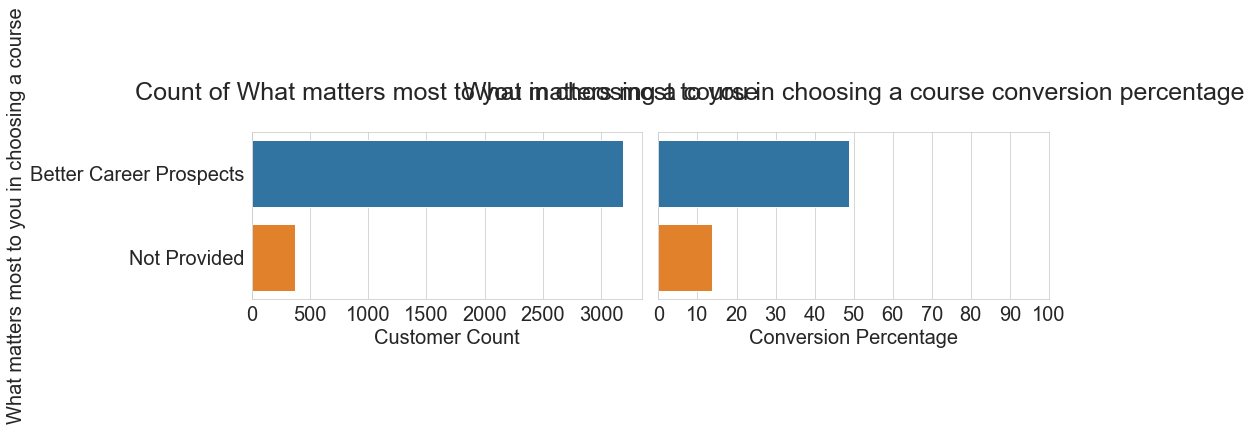

In [54]:
uni_bi_analysis('What matters most to you in choosing a course')

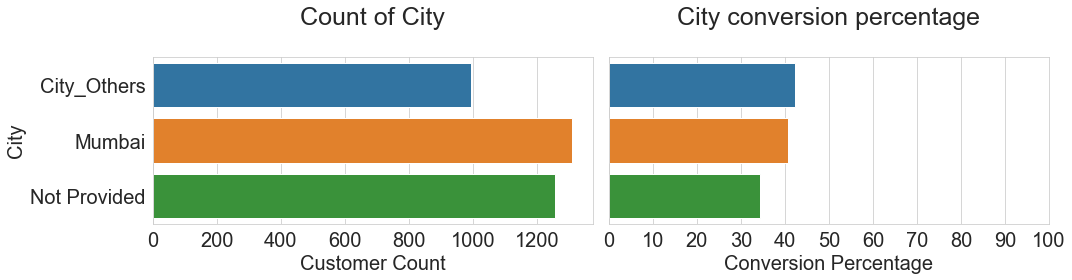

In [55]:
uni_bi_analysis('City')

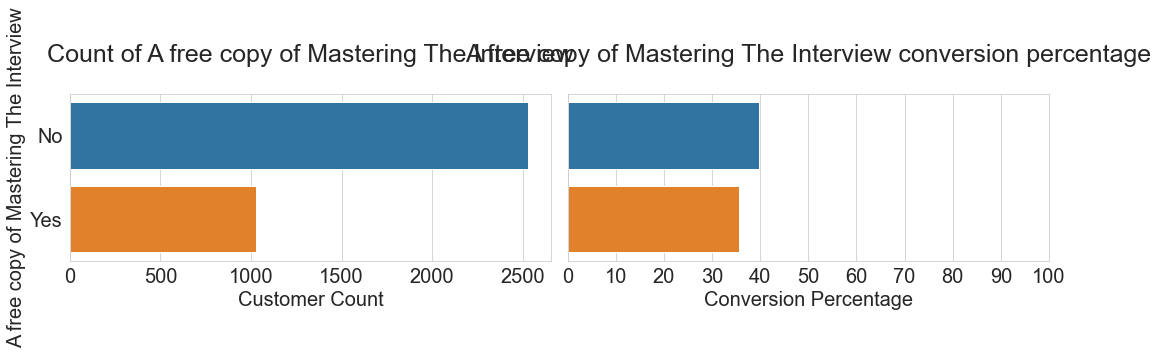

In [56]:
uni_bi_analysis('A free copy of Mastering The Interview')

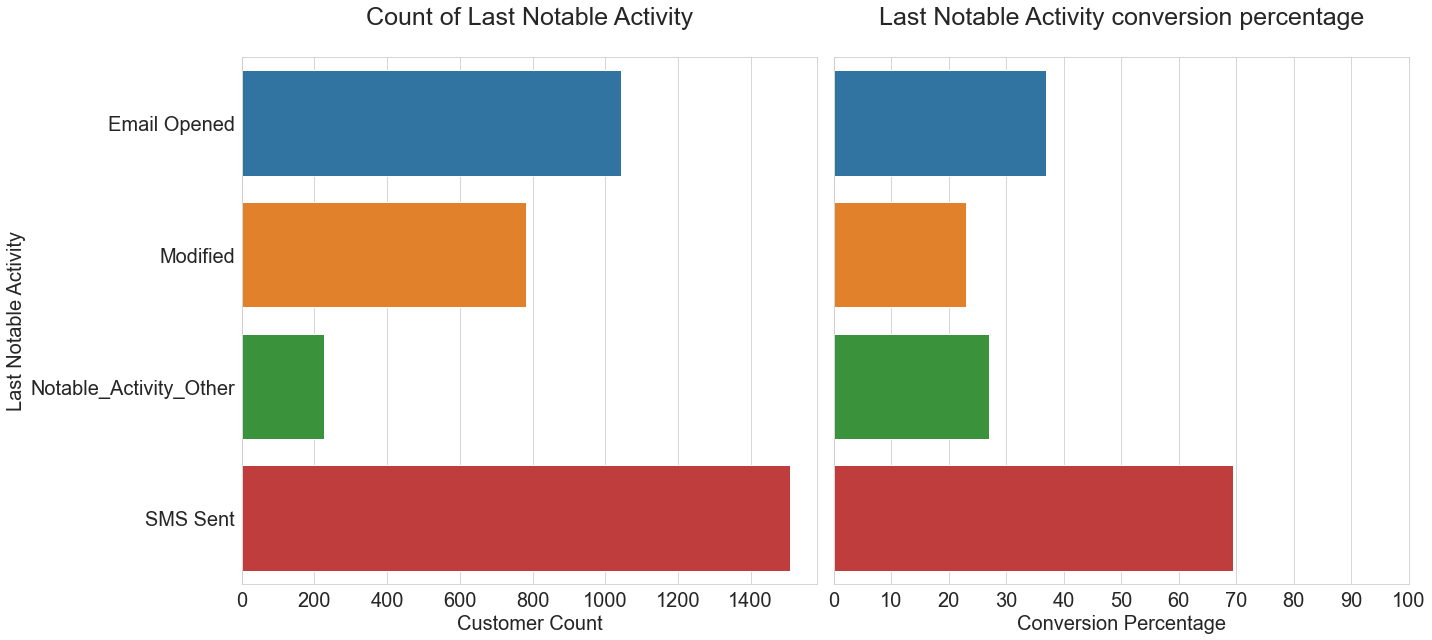

In [57]:
uni_bi_analysis('Last Notable Activity')

In [58]:
# Dropping the columns 'Prospect ID','Lead Number' as the don't add any value to the model

leads = leads.drop(['Prospect ID','Lead Number'],axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Last_Activity_Other,Not Provided,Unemployed,Better Career Prospects,Not Provided,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Better Career Prospects,Not Provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Specialization_Other,Occupation_Other,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Last_Activity_Other,Specialization_Other,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Last_Activity_Other,Not Provided,Unemployed,Better Career Prospects,Mumbai,No,Modified


# Converting Categorical culumns to Numerical columns

In [59]:
# Converting the categorical calumn into binary column

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [60]:
# Converting the Categorical culumns into dummie columns

lead = pd.get_dummies(leads['Lead Origin'],prefix='lead_origin')
lead = lead.drop(['lead_origin_Lead_Origin_Other'],axis=1)
leads = pd.concat([leads,lead],axis=1)

source = pd.get_dummies(leads['Lead Source'],prefix='Lead_Source')
source = source.drop(['Lead_Source_Lead_Source_Other'],axis=1)
leads = pd.concat([leads,source],axis=1)

activity = pd.get_dummies(leads['Last Activity'],prefix='Last_Activity')
activity = activity.drop(['Last_Activity_Last_Activity_Other'],axis=1)
leads = pd.concat([leads,activity],axis=1)

special = pd.get_dummies(leads['Specialization'],prefix='Specialization')
special = special.drop(['Specialization_Specialization_Other'],axis=1)
leads = pd.concat([leads,special],axis=1)

occupation = pd.get_dummies(leads['What is your current occupation'],prefix='occupation')
occupation = occupation.drop(['occupation_Occupation_Other'],axis=1)
leads = pd.concat([leads,occupation],axis=1)

What_matters = pd.get_dummies(leads['What matters most to you in choosing a course'],prefix='What_matters')
What_matters = What_matters.drop(['What_matters_Not Provided'],axis=1)
leads = pd.concat([leads,What_matters],axis=1)

cities = pd.get_dummies(leads['City'],prefix='City')
cities = cities.drop(['City_Not Provided'],axis=1)
leads = pd.concat([leads,cities],axis=1)

activity2 = pd.get_dummies(leads['Last Notable Activity'],prefix='Last_Notable_Activity')
activity2 = activity2.drop(['Last_Notable_Activity_Notable_Activity_Other'],axis=1)
leads = pd.concat([leads,activity2],axis=1)

In [61]:
leads.shape

(9240, 34)

In [62]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,occupation_Not Provided,occupation_Unemployed,What_matters_Better Career Prospects,City_City_Others,City_Mumbai,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Last_Activity_Other,Not Provided,Unemployed,Better Career Prospects,Not Provided,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Better Career Prospects,Not Provided,0,Email Opened,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Specialization_Other,Occupation_Other,Better Career Prospects,Mumbai,1,Email Opened,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Last_Activity_Other,Specialization_Other,Unemployed,Better Career Prospects,Mumbai,0,Modified,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Last_Activity_Other,Not Provided,Unemployed,Better Career Prospects,Mumbai,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0


In [63]:
# Dropping the categorical columns, these columns are not required any further analysis after the dummy creation.

leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                    'What matters most to you in choosing a course','City','Last Notable Activity'],axis=1)
leads.shape

(9240, 26)

In [64]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,occupation_Not Provided,occupation_Unemployed,What_matters_Better Career Prospects,City_City_Others,City_Mumbai,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554,0.387446,0.528788,0.275216,0.314286,0.189935,0.124892,0.383117,0.105303,0.297078,0.105628,0.091775,0.090693,0.365801,0.291126,0.606061,0.706494,0.254221,0.348701,0.305952,0.368723,0.235065
std,0.486714,4.819024,548.021466,2.145781,0.463559,0.487193,0.499198,0.446647,0.464256,0.392271,0.330614,0.486173,0.306960,0.456996,0.307377,0.288724,0.287187,0.481680,0.454306,0.488648,0.455393,0.435446,0.476585,0.460835,0.482485,0.424062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


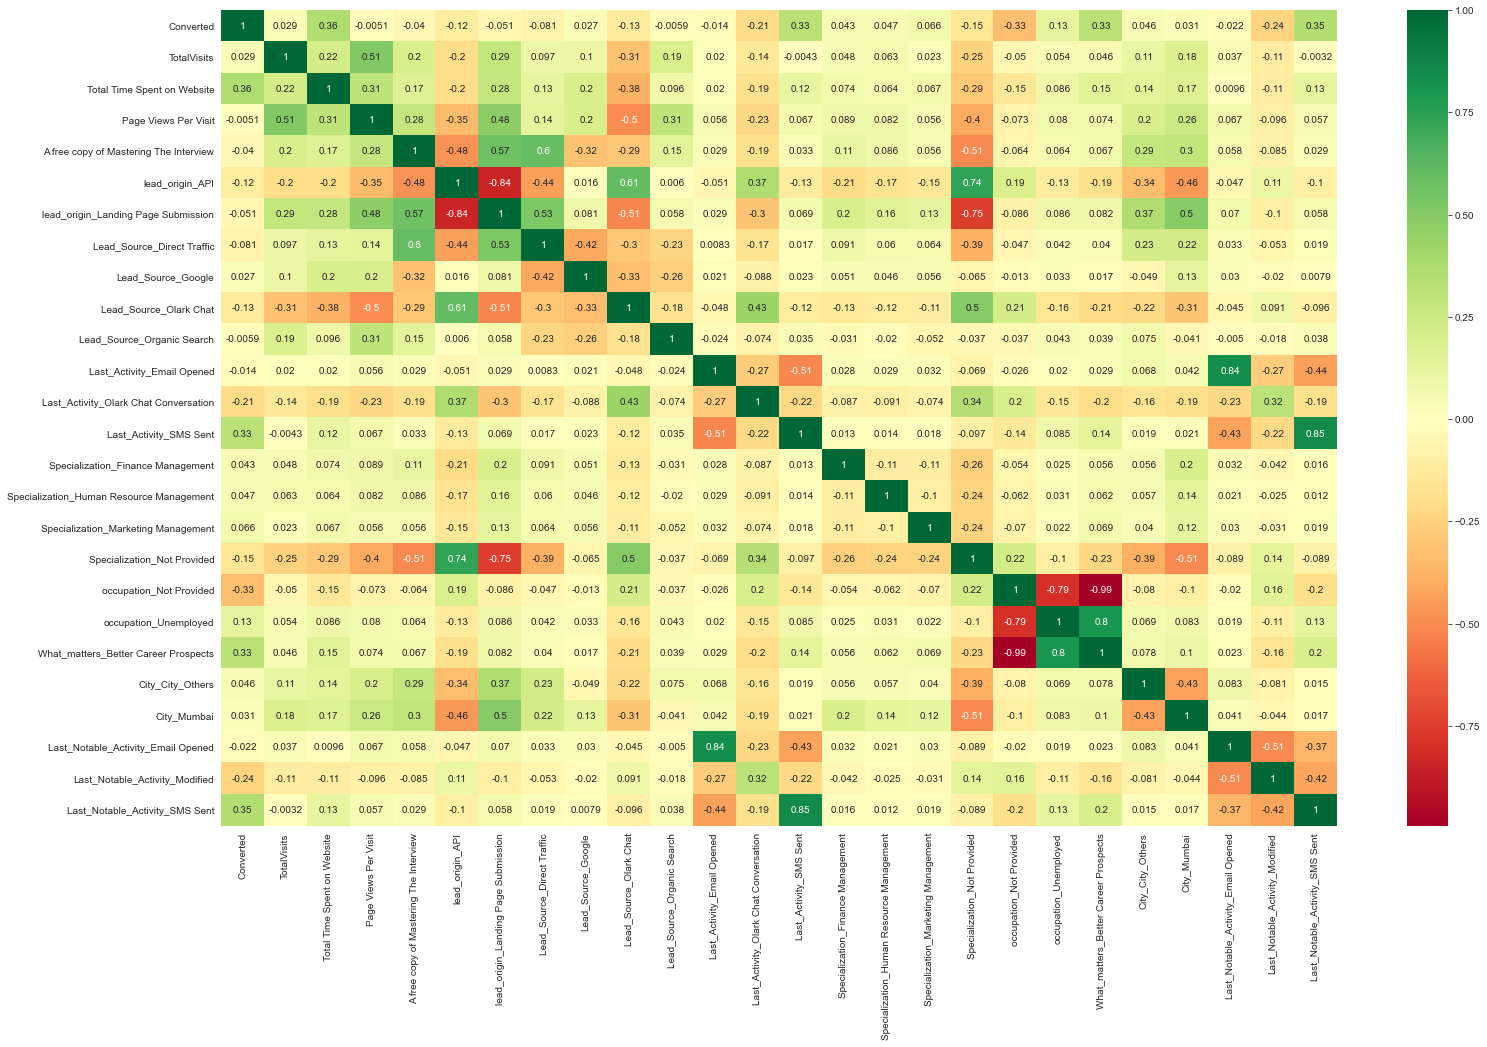

In [65]:
# Checking the inter-correlation between the columns 

plt.figure(figsize=(25,15))
sns.heatmap(leads.corr(),annot=True,cmap='RdYlGn')
sns.set(font_scale=1.5)
plt.show()

In [66]:
# Dropping 'Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Email Opened' as these represnt the same thing
# these columns 'Last_Activity_SMS Sent','Last_Activity_Email Opened' representing.

leads = leads.drop(['Last_Notable_Activity_SMS Sent','Last_Notable_Activity_Email Opened'],axis=1)

# Splitting the data
- we will split the entire data into training dataset and testing dataset.
- we will fit the model on the training dataset and check the accuray of the model on test dataset.

In [67]:
# Splitting the data into train and test data sets

df_train,df_test = train_test_split(leads,test_size=0.2,random_state=100)

In [68]:
df_train.shape

(7392, 24)

In [69]:
df_test.shape

(1848, 24)

# Feature Scaling.
- feature scaling will be prefered most of the times for its quick results and interpretability of the variables.
- scaling will done when the scale between two features are high.
- The scaling will be done with MinMaxScale() which fits all the values in between 0 - 1.

In [70]:
# Scaling 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit' columns

var_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = MinMaxScaler()
df_train[var_scale] = scaler.fit_transform(df_train[var_scale])
df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,occupation_Not Provided,occupation_Unemployed,What_matters_Better Career Prospects,City_City_Others,City_Mumbai,Last_Notable_Activity_Modified
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,0.382711,0.013854,0.212672,0.042952,0.311959,0.385281,0.530032,0.274756,0.317776,0.188447,0.121753,0.380547,0.103355,0.300054,0.106602,0.092397,0.093615,0.364719,0.293019,0.605655,0.704681,0.254735,0.347267,0.366613
std,0.486082,0.020450,0.240339,0.039535,0.463324,0.486695,0.499131,0.446422,0.465643,0.391095,0.327023,0.485554,0.304443,0.458312,0.308627,0.289605,0.291312,0.481384,0.455178,0.488743,0.456217,0.435742,0.476134,0.481912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003984,0.005282,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.011952,0.108275,0.036364,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.019920,0.406690,0.054545,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Splitting the data into dependent and independent variable

X_train = df_train.drop(['Converted'],axis=1)
y_train = df_train['Converted']

# Model Building.
- we will choose the Logistic Regression model as the target varible is Binary.

# Model 1 : With all the features
considering all the feature and determing the significance of the predictors in the model
- Many features are showing insignificant P-value and VIF, These features need to be checked and dropped accordingly.

In [72]:
# Creating the first logestic model with all the features.

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.2
Date:                Mon, 14 Jun 2021   Deviance:                       6076.4
Time:                        12:45:30   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0724      1.312     -0.055      0.956      -2.643       2.498
TotalVisits                                  7.5795      2.283      3.320      0.001       3.104      12.054
Total Time Spent on Website                  4.4884      0.156     28.818      0.000       4.183       4.794
Page Views Per Visit                        -4.3641      1.249     -3.494      0.000      -6.812      -1.916
A free copy of Mastering The Interview      -0.1465      0.100     -1.472      0.141      -0.342       0.049
lead_origin_API                             -2.5039      0.263     -9.527      0.000      -3.019      -1.989
lead_origin_Landing Page Submission         -3.4069      0.280    -12.150      0.000      -3.956      -2.857
Lead_Source_Direct Traffic                  -0.4290      0.248     -1.727      0.084      -0.916       0.058
Lead_Source_Google                          -0.1325      0.236     -0.562      0.574      -0.594       0.329
Lead_Source_Olark Chat                       0.7925      0.255      3.111      0.002       0.293       1.292
Lead_Source_Organic Search                  -0.1922      0.249     -0.770      0.441      -0.681       0.297
Last_Activity_Email Opened                   0.4798      0.100      4.798      0.000       0.284       0.676
Last_Activity_Olark Chat Conversation       -0.5586      0.175     -3.185      0.001      -0.902      -0.215
Last_Activity_SMS Sent                       1.6393      0.102     15.999      0.000       1.438       1.840
Specialization_Finance Management            0.1575      0.112      1.411      0.158      -0.061       0.376
Specialization_Human Resource Management     0.0085      0.116      0.074      0.941      -0.218       0.236
Specialization_Marketing Management          0.0227      0.118      0.193      0.847      -0.208       0.253
Specialization_Not Provided                 -0.8739      0.152     -5.751      0.000      -1.172      -0.576
occupation_Not Provided                      0.2598      1.295      0.201      0.841      -2.277       2.797
occupation_Unemployed                       -1.6510      0.124    -13.347      0.000      -1.893      -1.409
What_matters_Better Career Prospects         2.9843      1.296      2.303      0.021       0.445       5.524
City_City_Others                             0.1768      0.161      1.098      0.272      -0.139       0.492
City_Mumbai                                  0.1408      0.160      0.879      0.379      -0.173       0.455
Last_Notable_Activity_Modified              -0.6854      0.081     -8.512      0.000      -0.843      -0.528
============================================================================================================
"""

# Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,lead_origin_Landing Page Submission,36.20
4,lead_origin_API,23.70
19,What_matters_Better Career Prospects,23.67
7,Lead_Source_Google,15.85
6,Lead_Source_Direct Traffic,15.35
8,Lead_Source_Olark Chat,11.02
17,occupation_Not Provided,10.86
18,occupation_Unemployed,7.86
21,City_Mumbai,7.77
16,Specialization_Not Provided,7.15


# Model 2 - With RFE = 20.
RFE - Recursive feature elimination.
manually removing predictor one by one and checking the p-values and VIF's is quit time consuming and and difficult let's use the built in library (automated approach)which take cares of removing the insignificat predictors.
- There are still many predictors with insignificant p-value and high VIF, these features need to be removed one by one based
on importance of these variable in the model.

In [74]:
# fitting the regression model with sklearn library and finding top 20 good predictors with RFE.

logreg = LogisticRegression()

In [75]:
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
# printing the result of RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('lead_origin_API', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 4),
 ('Specialization_Marketing Management', False, 3),
 ('Specialization_Not Provided', True, 1),
 ('occupation_Not Provided', True, 1),
 ('occupation_Unemployed', True, 1),
 ('What_matters_Better Career Prospects', True, 1),
 ('City_City_Others', True, 1),
 ('City_Mumbai', False, 2),
 ('Last_Notable_Activity_Modified', True, 1)]

In [77]:
# storing the columns that supports the RFE in X_train_rfe

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'lead_origin_API',
       'lead_origin_Landing Page Submission', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Specialization_Finance Management', 'Specialization_Not Provided',
       'occupation_Not Provided', 'occupation_Unemployed',
       'What_matters_Better Career Prospects', 'City_City_Others',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [78]:
# The low significant predictors in the model. 

X_train.columns[~rfe.support_]

Index(['Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'City_Mumbai'],
      dtype='object')

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.6
Date:                Mon, 14 Jun 2021   Deviance:                       6077.2
Time:                        12:45:31   Pearson chi2:                 7.36e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0623      1.310      0.048      0.962      -2.505       2.629
TotalVisits                                7.6841      2.282      3.367      0.001       3.211      12.157
Total Time Spent on Website                4.4896      0.156     28.839      0.000       4.185       4.795
Page Views Per Visit                      -4.3354      1.248     -3.474      0.001      -6.782      -1.889
A free copy of Mastering The Interview    -0.1352      0.098     -1.374      0.169      -0.328       0.058
lead_origin_API                           -2.5218      0.262     -9.621      0.000      -3.036      -2.008
lead_origin_Landing Page Submission       -3.3813      0.279    -12.133      0.000      -3.927      -2.835
Lead_Source_Direct Traffic                -0.4354      0.248     -1.755      0.079      -0.921       0.051
Lead_Source_Google                        -0.1299      0.235     -0.552      0.581      -0.591       0.331
Lead_Source_Olark Chat                     0.7912      0.255      3.109      0.002       0.292       1.290
Lead_Source_Organic Search                -0.2030      0.249     -0.816      0.415      -0.691       0.285
Last_Activity_Email Opened                 0.4848      0.100      4.857      0.000       0.289       0.680
Last_Activity_Olark Chat Conversation     -0.5612      0.175     -3.201      0.001      -0.905      -0.218
Last_Activity_SMS Sent                     1.6382      0.102     15.990      0.000       1.437       1.839
Specialization_Finance Management          0.1570      0.106      1.476      0.140      -0.051       0.366
Specialization_Not Provided               -0.9559      0.119     -8.042      0.000      -1.189      -0.723
occupation_Not Provided                    0.2275      1.302      0.175      0.861      -2.323       2.778
occupation_Unemployed                     -1.6447      0.124    -13.302      0.000      -1.887      -1.402
What_matters_Better Career Prospects       2.9463      1.302      2.262      0.024       0.394       5.499
City_City_Others                           0.0526      0.079      0.666      0.506      -0.102       0.208
Last_Notable_Activity_Modified            -0.6828      0.080     -8.486      0.000      -0.841      -0.525
==========================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,477.85
18,What_matters_Better Career Prospects,95.84
16,occupation_Not Provided,93.48
6,lead_origin_Landing Page Submission,16.63
5,lead_origin_API,14.59
7,Lead_Source_Direct Traffic,11.14
8,Lead_Source_Google,10.81
9,Lead_Source_Olark Chat,8.94
10,Lead_Source_Organic Search,6.01
15,Specialization_Not Provided,3.14


# Model - 3 Manual Elimination of "City_City_Others" Column.
- Column "City_City_Others" has very high p-value and the coefficient is vey less.
- There are about six predictors shoving the insignificant P-value and 8 predictors showing high VIF.

In [81]:
X_train_sm = X_train_sm.drop(['City_City_Others'],axis=1)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.8
Date:                Mon, 14 Jun 2021   Deviance:                       6077.7
Time:                        12:45:31   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0983      1.306      0.075      0.940      -2.461       2.657
TotalVisits                                7.6613      2.283      3.356      0.001       3.187      12.135
Total Time Spent on Website                4.4926      0.156     28.865      0.000       4.188       4.798
Page Views Per Visit                      -4.3441      1.248     -3.481      0.001      -6.790      -1.898
A free copy of Mastering The Interview    -0.1344      0.098     -1.366      0.172      -0.327       0.058
lead_origin_API                           -2.5226      0.262     -9.625      0.000      -3.036      -2.009
lead_origin_Landing Page Submission       -3.3764      0.279    -12.121      0.000      -3.922      -2.830
Lead_Source_Direct Traffic                -0.4360      0.248     -1.758      0.079      -0.922       0.050
Lead_Source_Google                        -0.1343      0.235     -0.571      0.568      -0.595       0.327
Lead_Source_Olark Chat                     0.7896      0.254      3.103      0.002       0.291       1.288
Lead_Source_Organic Search                -0.2008      0.249     -0.807      0.420      -0.688       0.287
Last_Activity_Email Opened                 0.4873      0.100      4.884      0.000       0.292       0.683
Last_Activity_Olark Chat Conversation     -0.5603      0.175     -3.197      0.001      -0.904      -0.217
Last_Activity_SMS Sent                     1.6387      0.102     15.993      0.000       1.438       1.840
Specialization_Finance Management          0.1534      0.106      1.445      0.149      -0.055       0.362
Specialization_Not Provided               -0.9713      0.117     -8.328      0.000      -1.200      -0.743
occupation_Not Provided                    0.2099      1.298      0.162      0.872      -2.335       2.755
occupation_Unemployed                     -1.6439      0.124    -13.292      0.000      -1.886      -1.401
What_matters_Better Career Prospects       2.9276      1.299      2.254      0.024       0.381       5.474
Last_Notable_Activity_Modified            -0.6839      0.080     -8.501      0.000      -0.842      -0.526
==========================================================================================================
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,476.20
18,What_matters_Better Career Prospects,95.73
16,occupation_Not Provided,93.41
6,lead_origin_Landing Page Submission,16.59
5,lead_origin_API,14.59
7,Lead_Source_Direct Traffic,11.14
8,Lead_Source_Google,10.80
9,Lead_Source_Olark Chat,8.94
10,Lead_Source_Organic Search,6.01
15,Specialization_Not Provided,3.04


# Model - 4 Manual Elimination of "occupation_Not Provided" Column.
- Column "occupation_Not Provided" has very high p-value and the coefficient is vey less.
- There are about five predictors showing the insignificant P-value and six predictors showing high VIF.

In [83]:
X_train_sm = X_train_sm.drop(['occupation_Not Provided'],axis=1)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3038.9
Date:                Mon, 14 Jun 2021   Deviance:                       6077.7
Time:                        12:45:32   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3068      0.204      1.503      0.133      -0.093       0.707
TotalVisits                                7.6013      2.233      3.404      0.001       3.225      11.977
Total Time Spent on Website                4.4930      0.156     28.871      0.000       4.188       4.798
Page Views Per Visit                      -4.3347      1.246     -3.480      0.001      -6.776      -1.893
A free copy of Mastering The Interview    -0.1338      0.098     -1.360      0.174      -0.326       0.059
lead_origin_API                           -2.5225      0.262     -9.625      0.000      -3.036      -2.009
lead_origin_Landing Page Submission       -3.3766      0.279    -12.122      0.000      -3.923      -2.831
Lead_Source_Direct Traffic                -0.4351      0.248     -1.755      0.079      -0.921       0.051
Lead_Source_Google                        -0.1329      0.235     -0.565      0.572      -0.594       0.328
Lead_Source_Olark Chat                     0.7905      0.254      3.107      0.002       0.292       1.289
Lead_Source_Organic Search                -0.1994      0.249     -0.802      0.423      -0.687       0.288
Last_Activity_Email Opened                 0.4872      0.100      4.884      0.000       0.292       0.683
Last_Activity_Olark Chat Conversation     -0.5600      0.175     -3.195      0.001      -0.903      -0.216
Last_Activity_SMS Sent                     1.6387      0.102     15.994      0.000       1.438       1.840
Specialization_Finance Management          0.1536      0.106      1.446      0.148      -0.055       0.362
Specialization_Not Provided               -0.9713      0.117     -8.330      0.000      -1.200      -0.743
occupation_Unemployed                     -1.6444      0.124    -13.301      0.000      -1.887      -1.402
What_matters_Better Career Prospects       2.7188      0.140     19.476      0.000       2.445       2.992
Last_Notable_Activity_Modified            -0.6843      0.080     -8.511      0.000      -0.842      -0.527
==========================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.20
6,lead_origin_Landing Page Submission,16.58
5,lead_origin_API,14.58
7,Lead_Source_Direct Traffic,11.13
8,Lead_Source_Google,10.80
9,Lead_Source_Olark Chat,8.94
10,Lead_Source_Organic Search,6.01
17,What_matters_Better Career Prospects,3.37
16,occupation_Unemployed,3.04
15,Specialization_Not Provided,3.03


# Model - 5 Manual Elimination of "Lead_Source_Organic Search" Column.
- Column "Lead_Source_Organic Search" has very high p-value and the coefficient is vey less.
- There are about Three predictors showing the insignificant P-value and Two predictors showing high VIF.

In [85]:
X_train_sm = X_train_sm.drop(['Lead_Source_Organic Search'],axis=1)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3039.2
Date:                Mon, 14 Jun 2021   Deviance:                       6078.3
Time:                        12:45:32   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2984      0.204      1.464      0.143      -0.101       0.698
TotalVisits                                7.6538      2.246      3.407      0.001       3.251      12.057
Total Time Spent on Website                4.4916      0.156     28.868      0.000       4.187       4.797
Page Views Per Visit                      -4.3734      1.247     -3.508      0.000      -6.817      -1.930
A free copy of Mastering The Interview    -0.1419      0.098     -1.452      0.147      -0.334       0.050
lead_origin_API                           -2.6770      0.180    -14.873      0.000      -3.030      -2.324
lead_origin_Landing Page Submission       -3.5360      0.197    -17.949      0.000      -3.922      -3.150
Lead_Source_Direct Traffic                -0.2581      0.114     -2.257      0.024      -0.482      -0.034
Lead_Source_Google                         0.0354      0.108      0.328      0.743      -0.176       0.247
Lead_Source_Olark Chat                     0.9563      0.150      6.360      0.000       0.662       1.251
Last_Activity_Email Opened                 0.4881      0.100      4.892      0.000       0.293       0.684
Last_Activity_Olark Chat Conversation     -0.5574      0.175     -3.182      0.001      -0.901      -0.214
Last_Activity_SMS Sent                     1.6367      0.102     15.978      0.000       1.436       1.837
Specialization_Finance Management          0.1538      0.106      1.449      0.147      -0.054       0.362
Specialization_Not Provided               -0.9738      0.117     -8.351      0.000      -1.202      -0.745
occupation_Unemployed                     -1.6447      0.124    -13.306      0.000      -1.887      -1.402
What_matters_Better Career Prospects       2.7176      0.140     19.472      0.000       2.444       2.991
Last_Notable_Activity_Modified            -0.6830      0.080     -8.497      0.000      -0.841      -0.525
==========================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.13
6,lead_origin_Landing Page Submission,7.65
5,lead_origin_API,6.57
16,What_matters_Better Career Prospects,3.37
9,Lead_Source_Olark Chat,3.25
15,occupation_Unemployed,3.04
14,Specialization_Not Provided,3.03
7,Lead_Source_Direct Traffic,2.62
8,Lead_Source_Google,2.52
10,Last_Activity_Email Opened,2.09


# Model - 6 Manual Elimination of "Lead_Source_Google" Column.
- Column "Lead_Source_Google" has very high p-value and the coefficient is vey less.
- There are about two predictors showing the insignificant P-value and Two predictors showing high VIF.

In [87]:
X_train_sm = X_train_sm.drop(['Lead_Source_Google'],axis=1)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3039.2
Date:                Mon, 14 Jun 2021   Deviance:                       6078.5
Time:                        12:45:33   Pearson chi2:                 7.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3031      0.203      1.491      0.136      -0.095       0.702
TotalVisits                                7.6219      2.239      3.404      0.001       3.234      12.010
Total Time Spent on Website                4.4937      0.155     28.902      0.000       4.189       4.798
Page Views Per Visit                      -4.4343      1.233     -3.597      0.000      -6.850      -2.018
A free copy of Mastering The Interview    -0.1528      0.092     -1.662      0.097      -0.333       0.027
lead_origin_API                           -2.6521      0.163    -16.255      0.000      -2.972      -2.332
lead_origin_Landing Page Submission       -3.5083      0.178    -19.713      0.000      -3.857      -3.159
Lead_Source_Direct Traffic                -0.2794      0.094     -2.966      0.003      -0.464      -0.095
Lead_Source_Olark Chat                     0.9298      0.127      7.338      0.000       0.681       1.178
Last_Activity_Email Opened                 0.4889      0.100      4.901      0.000       0.293       0.684
Last_Activity_Olark Chat Conversation     -0.5566      0.175     -3.178      0.001      -0.900      -0.213
Last_Activity_SMS Sent                     1.6374      0.102     15.989      0.000       1.437       1.838
Specialization_Finance Management          0.1554      0.106      1.465      0.143      -0.053       0.363
Specialization_Not Provided               -0.9775      0.116     -8.422      0.000      -1.205      -0.750
occupation_Unemployed                     -1.6447      0.124    -13.303      0.000      -1.887      -1.402
What_matters_Better Career Prospects       2.7173      0.140     19.466      0.000       2.444       2.991
Last_Notable_Activity_Modified            -0.6828      0.080     -8.495      0.000      -0.840      -0.525
==========================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.03
6,lead_origin_Landing Page Submission,5.81
5,lead_origin_API,5.14
15,What_matters_Better Career Prospects,3.37
14,occupation_Unemployed,3.03
13,Specialization_Not Provided,3.01
8,Lead_Source_Olark Chat,2.25
9,Last_Activity_Email Opened,2.09
11,Last_Activity_SMS Sent,2.03
3,Page Views Per Visit,1.94


# Model - 7 Manual Elimination of "Specialization_Not Provided" Column.
- Column "Specialization_Not Provided" has very high p-value and the coefficient is vey less.
- "A free copy of Mastering The Interview" predictors showing the insignificant P-value and "lead_origin_Landing Page Submission" showing high VIF.

In [89]:
X_train_sm = X_train_sm.drop(['Specialization_Not Provided'],axis=1)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.9
Date:                Mon, 14 Jun 2021   Deviance:                       6151.7
Time:                        12:45:33   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3782      0.183     -2.071      0.038      -0.736      -0.020
TotalVisits                                8.0628      2.314      3.484      0.000       3.527      12.599
Total Time Spent on Website                4.5690      0.155     29.460      0.000       4.265       4.873
Page Views Per Visit                      -3.8693      1.223     -3.164      0.002      -6.266      -1.473
A free copy of Mastering The Interview    -0.0240      0.091     -0.265      0.791      -0.202       0.154
lead_origin_API                           -2.8380      0.161    -17.604      0.000      -3.154      -2.522
lead_origin_Landing Page Submission       -3.0528      0.165    -18.477      0.000      -3.377      -2.729
Lead_Source_Direct Traffic                -0.3312      0.094     -3.522      0.000      -0.516      -0.147
Lead_Source_Olark Chat                     0.9312      0.124      7.499      0.000       0.688       1.175
Last_Activity_Email Opened                 0.4898      0.099      4.960      0.000       0.296       0.683
Last_Activity_Olark Chat Conversation     -0.6168      0.172     -3.580      0.000      -0.954      -0.279
Last_Activity_SMS Sent                     1.6087      0.101     15.852      0.000       1.410       1.808
Specialization_Finance Management          0.2787      0.104      2.669      0.008       0.074       0.483
occupation_Unemployed                     -1.7634      0.120    -14.651      0.000      -1.999      -1.527
What_matters_Better Career Prospects       2.9244      0.136     21.558      0.000       2.658       3.190
Last_Notable_Activity_Modified            -0.6667      0.080     -8.377      0.000      -0.823      -0.511
==========================================================================================================
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.15
6,lead_origin_Landing Page Submission,5.36
5,lead_origin_API,4.90
14,What_matters_Better Career Prospects,3.11
13,occupation_Unemployed,2.88
8,Lead_Source_Olark Chat,2.25
9,Last_Activity_Email Opened,2.08
11,Last_Activity_SMS Sent,2.03
3,Page Views Per Visit,1.93
4,A free copy of Mastering The Interview,1.81


# Model - 8 Manual Elimination of "A free copy of Mastering The Interview" Column.
- Column "A free copy of Mastering The Interview" has very high p-value and the coefficient is vey less.
- All the predictors look significant and VIF within the limit lets move further for this model evaluation

In [91]:
X_train_sm = X_train_sm.drop(['A free copy of Mastering The Interview'],axis=1)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3075.9
Date:                Mon, 14 Jun 2021   Deviance:                       6151.8
Time:                        12:45:33   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3784      0.183     -2.072      0.038      -0.736      -0.020
TotalVisits                               8.0172      2.306      3.477      0.001       3.498      12.537
Total Time Spent on Website               4.5684      0.155     29.461      0.000       4.264       4.872
Page Views Per Visit                     -3.8888      1.221     -3.185      0.001      -6.281      -1.496
lead_origin_API                          -2.8366      0.161    -17.605      0.000      -3.152      -2.521
lead_origin_Landing Page Submission      -3.0584      0.164    -18.667      0.000      -3.380      -2.737
Lead_Source_Direct Traffic               -0.3423      0.084     -4.059      0.000      -0.508      -0.177
Lead_Source_Olark Chat                    0.9290      0.124      7.497      0.000       0.686       1.172
Last_Activity_Email Opened                0.4904      0.099      4.967      0.000       0.297       0.684
Last_Activity_Olark Chat Conversation    -0.6164      0.172     -3.577      0.000      -0.954      -0.279
Last_Activity_SMS Sent                    1.6093      0.101     15.861      0.000       1.410       1.808
Specialization_Finance Management         0.2788      0.104      2.671      0.008       0.074       0.483
occupation_Unemployed                    -1.7638      0.120    -14.655      0.000      -2.000      -1.528
What_matters_Better Career Prospects      2.9243      0.136     21.557      0.000       2.658       3.190
Last_Notable_Activity_Modified           -0.6664      0.080     -8.374      0.000      -0.822      -0.510
=========================================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,Features,VIF
0,const,26.14
5,lead_origin_Landing Page Submission,5.23
4,lead_origin_API,4.89
13,What_matters_Better Career Prospects,3.11
12,occupation_Unemployed,2.88
7,Lead_Source_Olark Chat,2.24
8,Last_Activity_Email Opened,2.08
10,Last_Activity_SMS Sent,2.03
3,Page Views Per Visit,1.92
9,Last_Activity_Olark Chat Conversation,1.63


# Model Evaluation

In [93]:
# Predicting for Train set with .predict() method and displaying top 10 values.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7263    0.213904
6468    0.308035
7833    0.283340
4461    0.913160
8453    0.082541
7094    0.992226
7932    0.082541
449     0.541340
5382    0.400272
3768    0.027415
dtype: float64

In [94]:
# Removing the index attached to the predicted values.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21390403, 0.3080347 , 0.28333962, 0.91316047, 0.08254077,
       0.99222588, 0.08254077, 0.54133995, 0.40027154, 0.0274148 ])

In [95]:
# Creating the dataframe for actual values and predicted probalities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.213904,7263
1,0,0.308035,6468
2,1,0.283340,7833
3,0,0.913160,4461
4,0,0.082541,8453


In [96]:
y_train.index

Int64Index([7263, 6468, 7833, 4461, 8453, 7094, 7932,  449, 5382, 3768,
            ...
            4376,  802, 5646, 7906, 4149,  350,   79, 8039, 6936, 5640],
           dtype='int64', length=7392)

# Taking Threshold = 0.5  
- Taking threshold = 0.5 i.e the values greater than 0.5 considered as converted and less than 0.5 considered as not converted.

In [97]:
# Using the probabilities for separating in to converted and not converted customers.

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.213904,7263,0
1,0,0.308035,6468,0
2,1,0.283340,7833,0
3,0,0.913160,4461,1
4,0,0.082541,8453,0


In [98]:
# Calculating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[4016  547]
 [ 841 1988]]


In [99]:
# Calulating the accuracy of the model

print("Accuracy = {}".format(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])))

Accuracy = 0.8122294372294372


In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity = {}".format(TP / float(TP+FN)))

Sensitivity = 0.7027218098267939


In [102]:
# Let us calculate specificity

print("Specificity = {}".format(TN / float(TN+FP)))

Specificity = 0.8801227262765724


In [103]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print("False Positive Rate = {}".format(FP/ float(TN+FP)))

False Positive Rate = 0.11987727372342757


# ROC CURVE

In [104]:
# Function to calculate and Plot ROC Curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

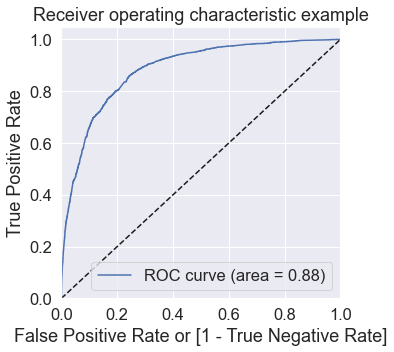

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [107]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.213904,7263,0,1,1,1,0,0,0,0,0,0,0
1,0,0.308035,6468,0,1,1,1,1,0,0,0,0,0,0
2,1,0.283340,7833,0,1,1,1,0,0,0,0,0,0,0
3,0,0.913160,4461,1,1,1,1,1,1,1,1,1,1,1
4,0,0.082541,8453,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382711  1.000000  0.000000
0.1   0.1  0.641910  0.970308  0.438308
0.2   0.2  0.750271  0.920820  0.644532
0.3   0.3  0.791531  0.870272  0.742713
0.4   0.4  0.808442  0.775539  0.828841
0.5   0.5  0.812229  0.702722  0.880123
0.6   0.6  0.803030  0.634146  0.907736
0.7   0.7  0.777327  0.517497  0.938418
0.8   0.8  0.747971  0.393779  0.967565
0.9   0.9  0.707792  0.256981  0.987289


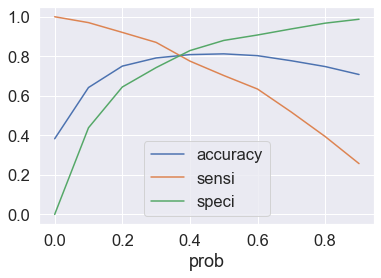

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# Taking threshold = 0.35

In [110]:
# Taking the Threshold as 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.213904,7263,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.308035,6468,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.283340,7833,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.913160,4461,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.082541,8453,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# Let's check the overall accuracy.
print("Accuracy = {}".format(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])))

Accuracy = 0.8122294372294372


In [112]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3629,  934],
       [ 549, 2280]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = {}".format(TP / float(TP+FN)))

Sensitivity = 0.8059384941675504


In [115]:
# Let us calculate specificity
print("Specificity = {}".format(TN / float(TN+FP)))

Specificity = 0.7953101030024107


# Making Predictions on Test set

In [116]:
var_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df_test[var_scale] = scaler.transform(df_test[var_scale])
df_test.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,occupation_Not Provided,occupation_Unemployed,What_matters_Better Career Prospects,City_City_Others,City_Mumbai,Last_Notable_Activity_Modified
count,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.00000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,0.396104,0.013082,0.222591,0.042507,0.314935,0.396104,0.523810,0.277056,0.300325,0.195887,0.137446,0.393398,0.113095,0.285173,0.101732,0.089286,0.079004,0.37013,0.283550,0.607684,0.713745,0.252165,0.354437,0.377165
std,0.489219,0.013037,0.244549,0.036865,0.464616,0.489219,0.499568,0.447666,0.458523,0.396990,0.344411,0.488636,0.316795,0.451619,0.302377,0.285233,0.269819,0.48297,0.450843,0.488399,0.452133,0.434373,0.478472,0.484808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003984,0.003521,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.011952,0.115537,0.036364,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.019920,0.424846,0.060545,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,0.167331,0.971391,0.290909,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
X_test = df_test.drop(['Converted'],axis=1)
y_test = df_test['Converted']

In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
X_train_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'lead_origin_API',
       'lead_origin_Landing Page Submission', 'Lead_Source_Direct Traffic',
       'Lead_Source_Olark Chat', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Specialization_Finance Management', 'occupation_Unemployed',
       'What_matters_Better Career Prospects',
       'Last_Notable_Activity_Modified'],
      dtype='object')

In [120]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Not Provided,occupation_Not Provided,occupation_Unemployed,What_matters_Better Career Prospects,City_City_Others,City_Mumbai,Last_Notable_Activity_Modified
4269,1.0,0.031873,0.444982,0.145455,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2376,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
7766,1.0,0.019920,0.025968,0.090909,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9199,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
4359,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0


In [121]:
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lead_origin_API,lead_origin_Landing Page Submission,Lead_Source_Direct Traffic,Lead_Source_Olark Chat,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Finance Management,occupation_Unemployed,What_matters_Better Career Prospects,Last_Notable_Activity_Modified
4269,1.0,0.031873,0.444982,0.145455,1,0,1,0,0,0,1,0,0,0,0
2376,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,1,0
7766,1.0,0.019920,0.025968,0.090909,1,0,0,0,0,0,0,0,0,1,0
9199,1.0,0.000000,0.000000,0.000000,1,0,0,1,0,1,0,0,1,1,1
4359,1.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1,1,0


In [122]:
X_test_sm.shape

(1848, 15)

In [123]:
X_train_sm.shape

(7392, 15)

In [124]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7263    0.213904
6468    0.308035
7833    0.283340
4461    0.913160
8453    0.082541
7094    0.992226
7932    0.082541
449     0.541340
5382    0.400272
3768    0.027415
dtype: float64

In [125]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.443907
2376    0.916170
7766    0.409526
9199    0.082541
4359    0.781171
9186    0.581992
1631    0.583202
8963    0.262018
8007    0.037360
5324    0.386607
dtype: float64

In [126]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.44390729, 0.91617022, 0.40952563, 0.08254077, 0.78117084,
       0.58199179, 0.58320151, 0.26201831, 0.03736043, 0.38660685])

In [127]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.443907,4269
1,1,0.916170,2376
2,1,0.409526,7766
3,0,0.082541,9199
4,1,0.781171,4359


In [128]:
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.443907,4269,1
1,1,0.916170,2376,1
2,1,0.409526,7766,1
3,0,0.082541,9199,0
4,1,0.781171,4359,1


In [129]:
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[881 235]
 [150 582]]


In [130]:
print("Accuracy = {}".format(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])))

Accuracy = 0.8122294372294372


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = {}".format(TP / float(TP+FN)))

Sensitivity = 0.7950819672131147


In [133]:
# Let us calculate specificity
print("Specificity = {}".format(TN / float(TN+FP)))

Specificity = 0.7894265232974911


# Model Performance.

Training Accuracy    = 79.93 % <br>
Training Sensitivity = 80.59 % <br>
Training Specificity = 79.53 % <br>

---------------------------------------------
Test Accuracy    = 81.22 % <br>
Test Sensitivity = 79.50 % <br>
Test Specificity = 78.94 % <br>


# EDA Insigths.
- "Conversion" :- The Data set is imbalanced with target column "Conversion" having  Not-converted (61.46 %) and converted leads (38.54 %), The Target variable is small correlated with "Time Spent on website" i.e (0.36).
- "Lead Origin" :- The Lead Origin from Landing Page and API is more but the Conversion percentage bit low ranging from 30 % to 35%.
- "Lead Source" :- Many Lead Sources are from Google and Direct Trafic but the conversion rate is low (30%-40%), but the leads from other sources showing good conversion rete up to 75%.
- "Last Activity" :- SMS and Mail are good mode for remainder and sending info of the coarse. The conversion for SMS (62%) and for mails (38%).
- "Specialization" : Most of the leads are not provinding the Specialization details and conversion rate is not high for any particular specialization.
- "What is your current occupation" :- most of the leads are Unemployed.
- "hat matters most to you in choosing a course" : - Most of the leads are searching for better carrer and the conversion rate is also good for these leads (49 %).
- "City" :- many leads are from the Mumbai and conversion rate is avg for all the city leads.

# CONSCLUSION

### Good Leads.
- More the number of visit to the site more the conversion rate for leads.
- More the time spent by the leads on the website more conversion rate.
- The leads from Olark chart are getting converted.
- Interested candidate open and checks the mail.
- Sending SMS to leads leading to many leads to take the coarse.
- The leads who are interested in Finance Management specialization are taking up the coarse.
- The should target the leads who are more interested in career prospect.

### Bad Leads Activities
- More Page views per visit.
- Origin of lead from API.
- Landing page submission.
- Lead sourese Direct Traffic.
- last Activity of the lead Olark Chart conversation.
- Unemployed lead.
- Last activity notated is modified.